In [1]:
# Calcula un índice por país de vulnerabilidad socioeconómica

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de variables a usar
vars = ["HDI", "GDI",
    "Scientific articles per million inhabitants",
    "Total debt service [% of GNI]",
    "Central government debt [% of GDP]",
    "Gini coefficient"]
var_i = [v + "_index" for v in vars]

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (HDI)
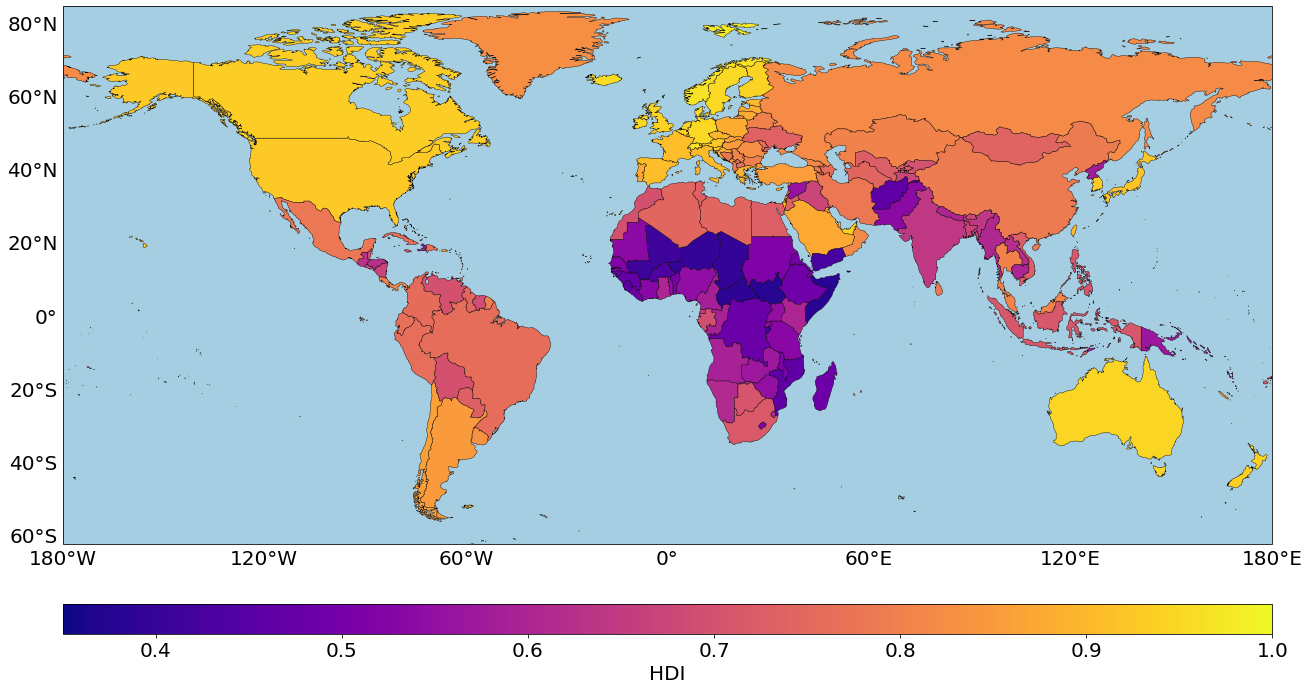

Sin datos: 0 países


,Name,HDI
ISO_A3,,
SOM,Somalia,0.380
SSD,South Sudan,0.381
CAF,Central African Republic,0.387
TCD,Chad,0.394
NER,Niger,0.394
MLI,Mali,0.410
BDI,Burundi,0.420
YEM,Yemen,0.424
BFA,Burkina Faso,0.438


In [3]:
# Primeras dos categorías
id = "GDI_HDI"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])


# HDI: Human Development Index
i = 0

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Mónaco por motivos de visualización
borders.loc["MCO"] = np.nan
min = 0.05 * np.floor( borders[vars[i]].min() * 20 )
max = 0.05 * np.ceil( borders[vars[i]].max() * 20 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (GDI)
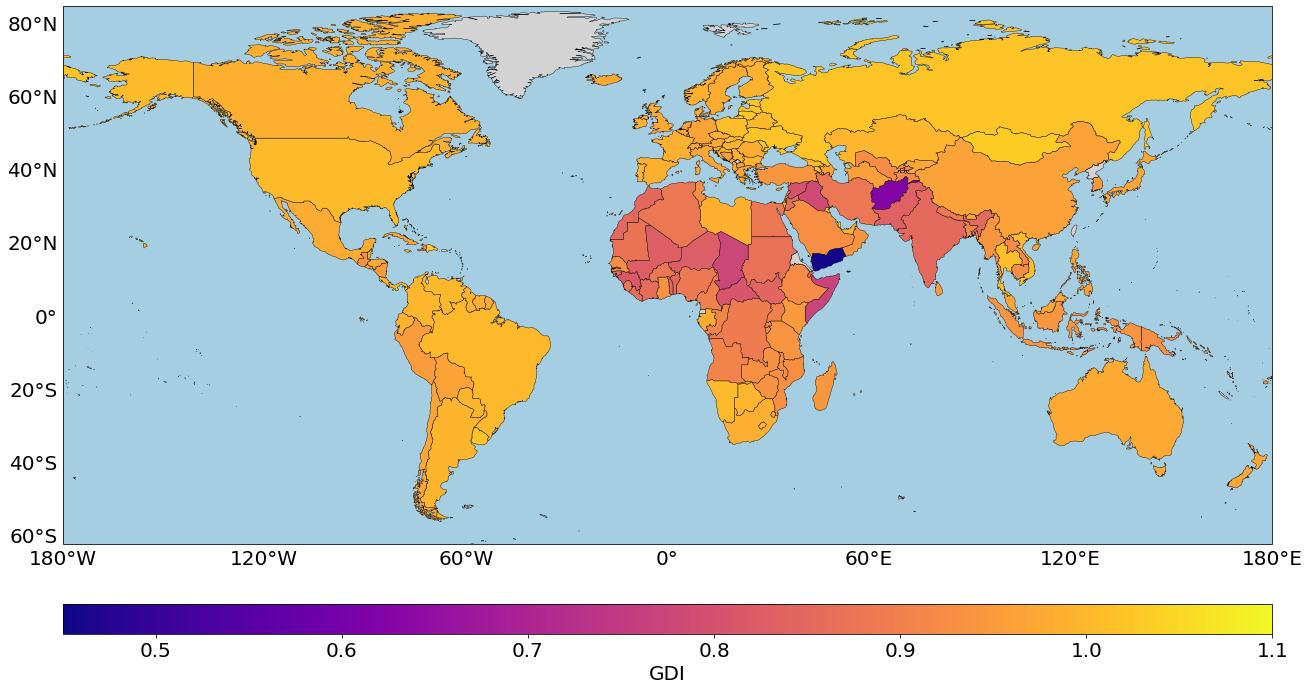

Sin datos: 50 países


,Name,GDI
ISO_A3,,
YEM,Yemen,0.456
AFG,Afghanistan,0.622
SOM,Somalia,0.769
TCD,Chad,0.776
IRQ,Iraq,0.786
SYR,Syrian Arab Republic,0.805
CAF,Central African Republic,0.810
GIN,Guinea,0.818
NER,Niger,0.826


In [4]:
# GDI: Gender Development Index
i = 1

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 0.05 * np.floor( borders[vars[i]].min() * 20 )
max = 0.05 * np.ceil( borders[vars[i]].max() * 20 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Scientific articles per million inhabitants)
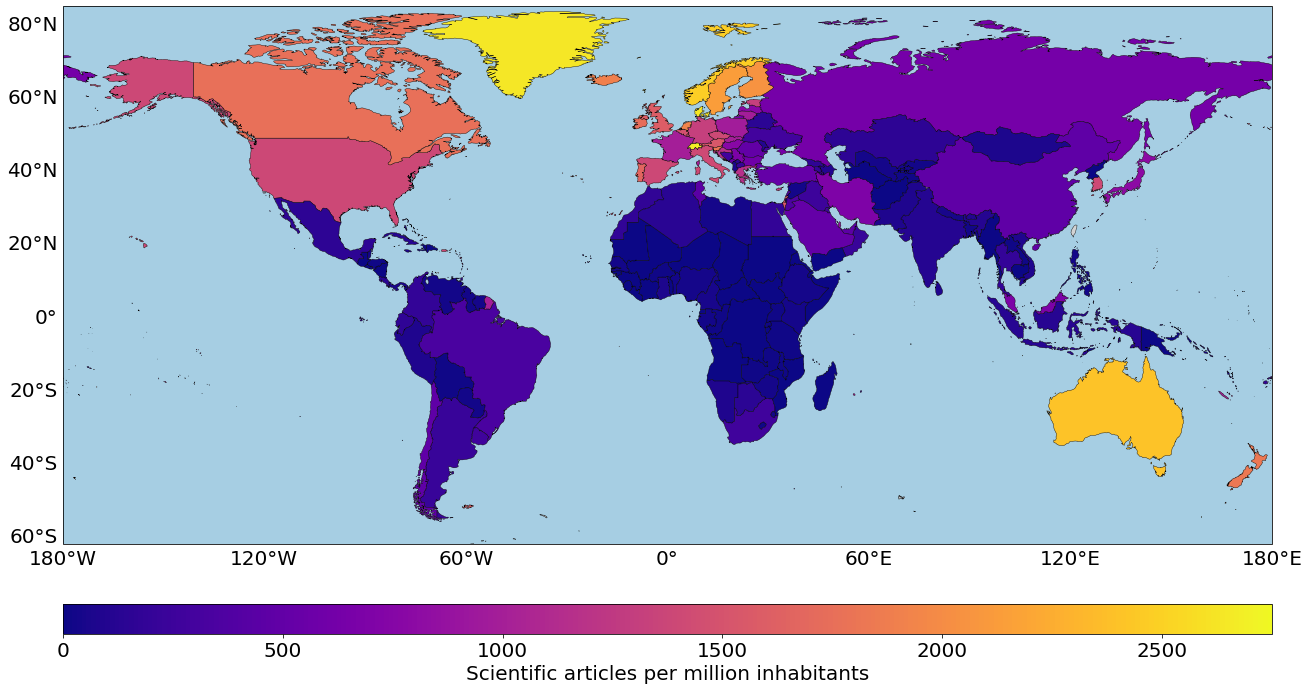

Sin datos: 4 países


,Name,Scientific articles per million inhabitants
SVN_A3,,
TCD,Chad,0.882304
TKM,Turkmenistan,0.925600
GNQ,Equatorial Guinea,1.253700
SSD,South Sudan,1.289989
AGO,Angola,1.426852
COD,Congo (Democratic Republic of the),1.979017
LBR,Liberia,2.444619
SLV,El Salvador,2.629559
NER,Niger,2.730504


In [5]:
# Scientific articles per million inhabitants
id = "IP.JRN.ARTC.SC"
i = 2

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df["POP_EST"] = borders["POP_EST"]
df[vars[i]] = df[vars[i]] / df["POP_EST"] * 1e6

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = np.floor( borders[vars[i]].min() )
max = 2750#np.ceil( borders[vars[i]].max() )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Total debt service [% of GNI])
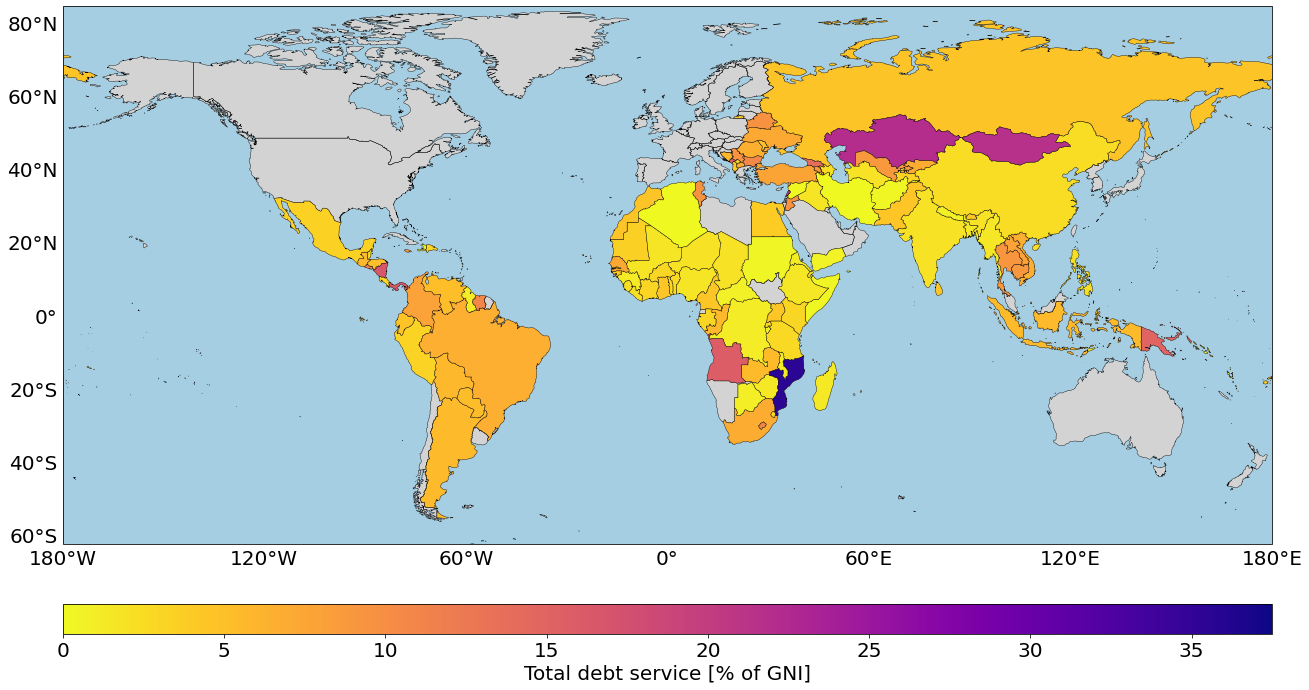

Sin datos: 116 países


,Name,Total debt service [% of GNI]
SVN_A3,,
MOZ,Mozambique,35.564801
KAZ,Kazakhstan,22.094875
MNG,Mongolia,21.547483
LBN,Lebanon,20.940254
NIC,Nicaragua,16.571052
PAN,Panama,16.362585
AGO,Angola,15.900413
MNE,Montenegro,15.794174
PNG,Papua New Guinea,14.941915


In [6]:
# Total debt service [% of GNI]
id = "DT.TDS.DECT.GN.ZS"
i = 3

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 37.5#10 * np.ceil( borders[vars[i]].max() * 0.1 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = False).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Central government debt [% of GDP])
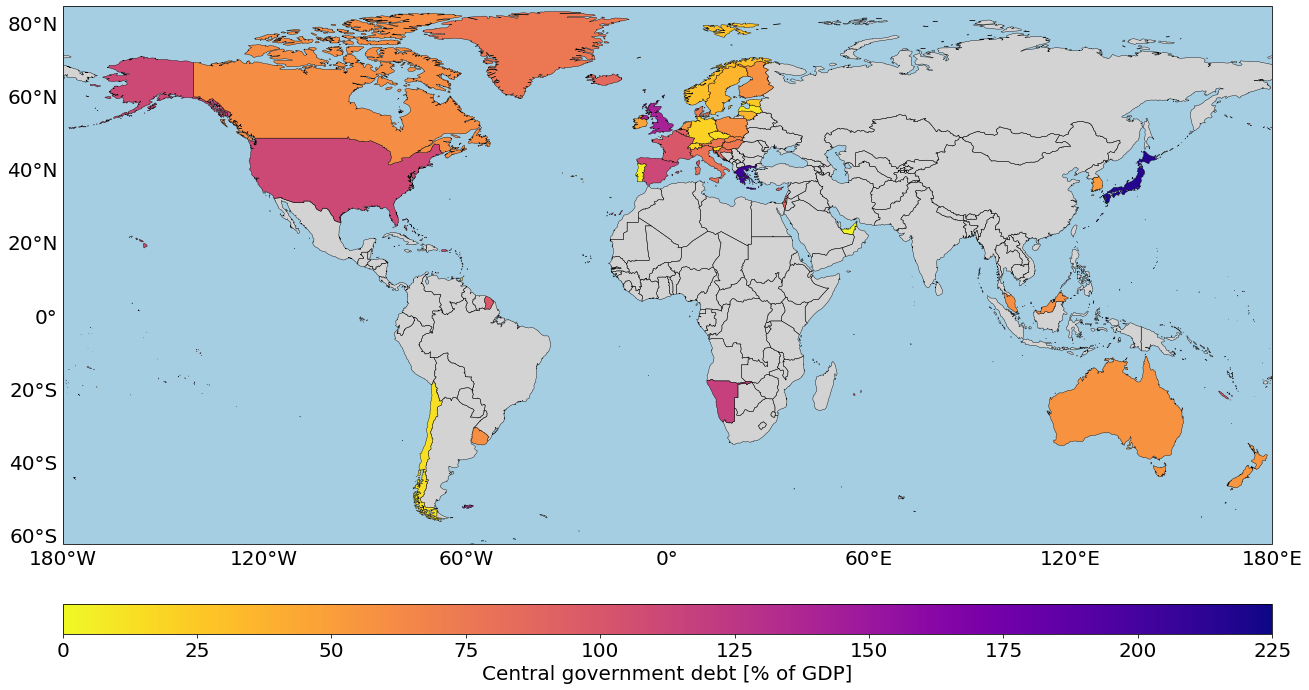

Sin datos: 146 países


,Name,Central government debt [% of GDP]
SVN_A3,,
JPN,Japan,216.213375
GRC,Greece,203.285809
SGP,Singapore,150.141913
BRB,Barbados,146.460053
GBR,Bermuda,142.283042
GBR,Turks and Caicos,142.283042
GBR,Isle of Man,142.283042
GBR,British Virgin Islands,142.283042
GBR,Falkland Islands,142.283042


In [7]:
# Central government debt [% of GDP]
id = "GC.DOD.TOTL.GD.ZS"
i = 4

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df[vars[i]] = df[vars[i]].where( df[vars[i-1]].isnull(), np.nan )

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 225#np.ceil( borders[vars[i]].max() )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = False).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gini coefficient)
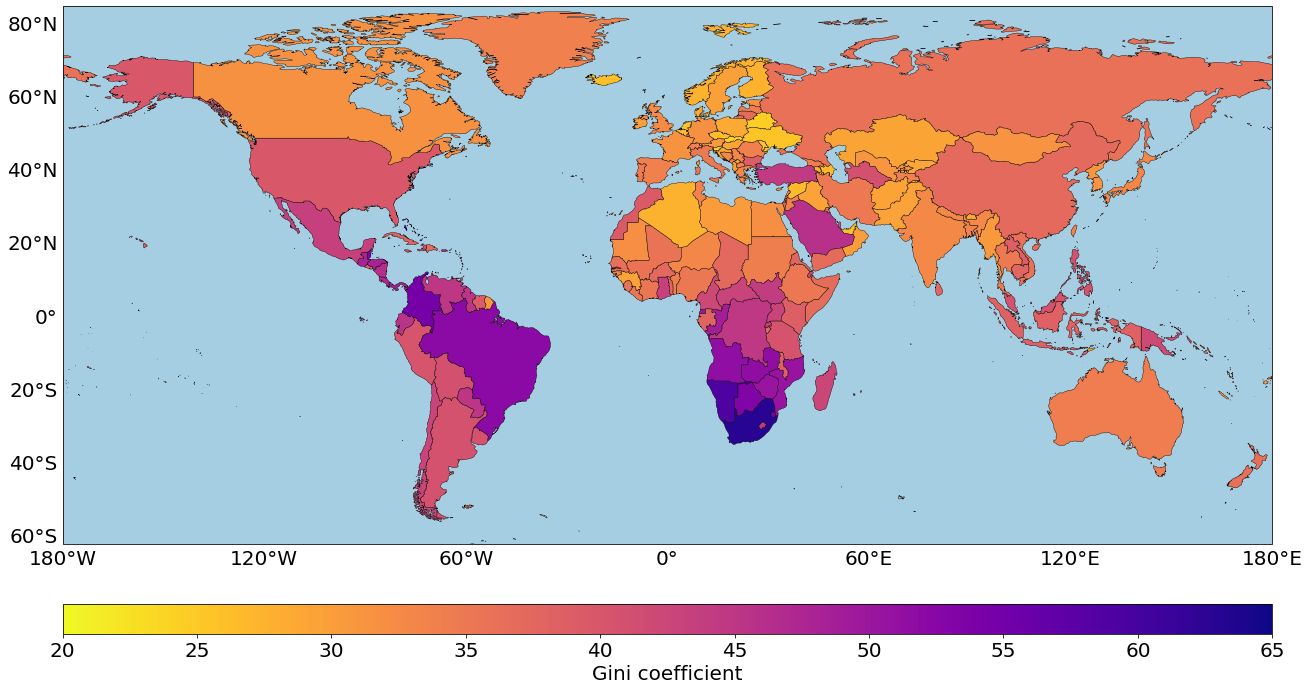

Sin datos: 0 países


,Name,Gini coefficient
ISO_A3,,
FRO,Faroe Islands,22.7
VGB,British Virgin Islands,23.0
SVK,Slovakia,24.1
SVN,Slovenia,24.3
BLR,Belarus,24.4
UKR,Ukraine,25.6
ALA,Aland,25.6
NLD,Netherlands,25.7
MDA,Moldova (Republic of),25.7


In [8]:
# Gini coefficient
id = "SI.POV.GINI"
i = 5

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0][:-4] + "_extra.csv",
    skiprows = 4 ).rename( columns = {"Country Code": ix}
    ).drop(columns = ["Source"])
df = df.reset_index().set_index(ix)
df[vars[i]] = df_i.set_index(ix).iloc[ :, 4: ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 5 * np.floor( borders[vars[i]].min() * 0.2 )
max = 5 * np.ceil( borders[vars[i]].max() * 0.2 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = True).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Socioeconomic vulnerability index)
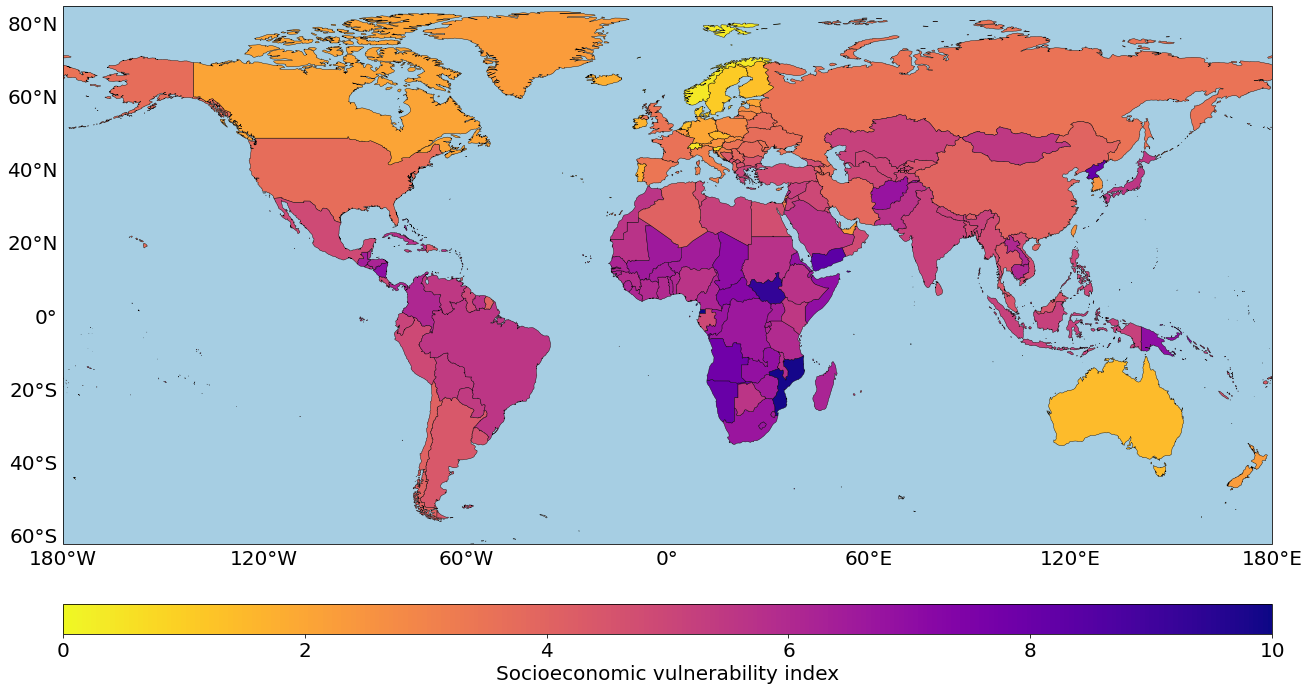

,Name,Socioeconomic vulnerability index,HDI_index,GDI_index,Scientific articles per million inhabitants_index,Total debt service [% of GNI]_index,Central government debt [% of GDP]_index,Gini coefficient_index
ISO_A3,,,,,,,,
GNQ,Equatorial Guinea,10.000000,6.270718,NaN,9.998619,NaN,NaN,6.823821
MOZ,Mozambique,9.847461,8.881215,2.220395,9.982057,10.000000,NaN,6.898263
SSD,South Sudan,9.299591,9.986188,3.634868,9.998485,NaN,NaN,5.310174
ATG,Antigua and Barbuda,8.368632,3.839779,NaN,9.724248,NaN,NaN,6.277916
YEM,Yemen,8.341898,9.392265,10.000000,9.967257,0.147637,NaN,3.473945
PRK,North Korea,8.077135,7.223757,NaN,9.977697,NaN,NaN,2.059553
NAM,Namibia,8.020145,6.823204,0.953947,9.707123,NaN,5.395849,9.032258
AGO,Angola,7.825409,7.085635,2.615132,9.997976,4.470036,NaN,7.096774
CAF,Central African Republic,7.242076,9.903315,4.177632,9.989712,0.220098,NaN,5.037221


In [9]:
# Índice de vulnerabilidad socioeconómica
index_n = "Socioeconomic vulnerability index"

# Índice por unidad geográfico ISO-3166-1
df = df.reset_index().set_index(ix)

# Cálculo del índice para cada categoría
var_i = [v + "_index" for v in vars]
# Normalización 0-10
for i, v in enumerate(vars):
    min_v = df[v].min()
    max_v = df[v].max()
    rng_v = max_v - min_v
    df[ var_i[i] ] = 10 * ( df[v] - min_v ) / rng_v
    if v in vars[0:3]: df[ var_i[i] ] = 10 - df[ var_i[i] ]

# Cálculo del índice
df[index_n] = df[var_i].mean(axis = 1)
# Normalización 0-10
min_v = df[index_n].min()
max_v = df[index_n].max()
rng_v = max_v - min_v
df[ index_n ] = 10 * ( df[index_n] - min_v ) / rng_v

# Guardamos el archivo
df.to_csv(path_r + "socioeconomic_index.csv")

# Mapa
borders[index_n] = df[index_n]
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos
df[["Name", index_n] + var_i].sort_values(index_n, ascending = False).head(10)

In [10]:
# Información para un país específico
country = "FJI"

df.loc[country]

SVN_A3                                                     FJI
Name                                                      Fiji
HDI                                                      0.729
GDI                                                       0.94
Scientific articles per million inhabitants          197.67336
POP_EST                                               889953.0
Total debt service [% of GNI]                         3.669151
Central government debt [% of GDP]                         NaN
Gini coefficient                                          30.7
HDI_index                                             5.179558
GDI_index                                             2.039474
Scientific articles per million inhabitants_index     9.268472
Total debt service [% of GNI]_index                   1.030395
Central government debt [% of GDP]_index                   NaN
Gini coefficient_index                                1.985112
Socioeconomic vulnerability index                     4